## Polytope On-Demand-DT Country cut-out example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-geo
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [9]:
import earthkit.data
import earthkit.plots
from earthkit.geo import cartography

In [ ]:
countries = ["Ireland"] # List of countries
shapes = cartography.country_polygons(countries, resolution=500e5)

# Remap longitude points to range [0, 360]
for shape in shapes:
    for point in shape:
        lon = point[1]
        if lon < 0:
            point[1] = lon + 360


305


In [11]:
request = {
    "class": "d1",
    "dataset": "on-demand-extremes-dt",
    "stream": "oper",
    "type": "fc",
    "date": "20250926",
    "time": "0000",
    "levtype": "sfc",
    "expver": "0099",
    "param": "167",
    "step": "1/to/9",
    "georef": "gcgkrb",
    "feature": {
        "type": "polygon",
        "shape": shapes,
    },
}


In [ ]:
data = earthkit.data.from_source("polytope", "destination-earth", request,
                               stream=False,
                               address="polytope.lumi.apps.dte.destination-earth.eu",
                               )

In [13]:
ds = data.to_xarray()
ds

<xarray.Dataset> Size: 24MB
Dimensions:    (datetimes: 1, number: 1, steps: 9, points: 230656)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-09-26T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 72B 1 2 3 4 5 6 7 8 9
  * points     (points) int64 2MB 0 1 2 3 4 ... 230652 230653 230654 230655
    latitude   (points) float64 2MB 52.18 52.18 52.18 ... 55.36 55.36 55.37
    longitude  (points) float64 2MB 349.6 349.6 349.6 ... 352.7 352.7 352.7
    levelist   (points) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    2t         (datetimes, number, steps, points) float64 17MB 286.8 ... 286.9
Attributes:
    class:          d1
    dataset:        on-demand-extremes-dt
    stream:         oper
    expver:         0099
    type:           fc
    Forecast date:  2025-09-26T00:00:00Z
    levtype:        sfc
    georef:         gcgkrb
    step:           1
    number:         0
    date:           2025-09-26T00:00:00Z

In [14]:
data_single_step = ds.sel(steps=1, number=0, datetimes='2025-09-26T00:00:00Z')

data_single_step

<xarray.Dataset> Size: 9MB
Dimensions:    (points: 230656)
Coordinates:
  * points     (points) int64 2MB 0 1 2 3 4 ... 230652 230653 230654 230655
    datetimes  <U20 80B '2025-09-26T00:00:00Z'
    number     int64 8B 0
    steps      int64 8B 1
    latitude   (points) float64 2MB 52.18 52.18 52.18 ... 55.36 55.36 55.37
    longitude  (points) float64 2MB 349.6 349.6 349.6 ... 352.7 352.7 352.7
    levelist   (points) float64 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    2t         (points) float64 2MB 286.8 286.7 286.6 ... 283.3 283.4 283.7
Attributes:
    class:          d1
    dataset:        on-demand-extremes-dt
    stream:         oper
    expver:         0099
    type:           fc
    Forecast date:  2025-09-26T00:00:00Z
    levtype:        sfc
    georef:         gcgkrb
    step:           1
    number:         0
    date:           2025-09-26T00:00:00Z

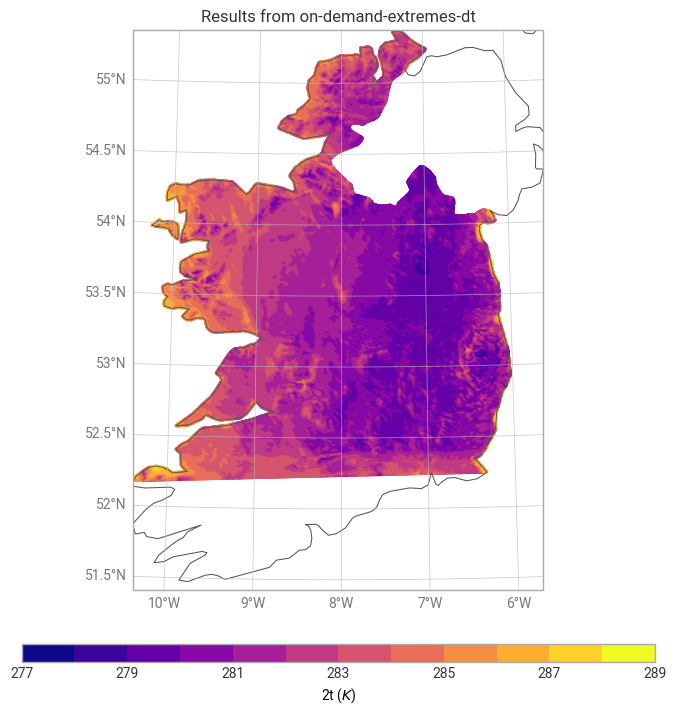

In [15]:
import earthkit.plots
chart = earthkit.plots.Map(domain="Ireland")
chart.point_cloud(
    data_single_step['2t'],
    x="longitude",
    y="latitude",
)
chart.title(f"Results from on-demand-extremes-dt")
chart.coastlines()
chart.gridlines()
chart.legend()
chart.show()